In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl

top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM')
import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis

yr_time = 21733327.980990734
msun_mass = 3013.804161676407
sn_time = 9.2e-06 * yr_time; print(sn_time)

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

199.94661742511477


In [2]:
initial_sn = np.array([158, 222, 177, 212, 235, 342, 401, 403, 445]) + 1
final_sn = [439, 292, 205, 258, 294, 394, 441, 430, 495]
sinks = [6, 13, 14, 25, 82, 122, 162, 180, 225]
true_sink = [6, 13, 13, 24, 80, 122, 161, 178, 225]

In [5]:
initial_sn = np.array([222, 177, 212, 235, 342, 401, 403, 445]) + 1
final_sn = [309, 205, 258, 294, 394, 441, 430, 495]
sinks = [13, 14, 25, 82, 122, 162, 180, 225]
true_sink = [13, 13, 24, 80, 122, 161, 178, 225]

In [7]:
sinks

[13, 14, 25, 82, 122, 162, 180, 225]

In [15]:
sink_mass = {key: [] for key in sinks}
for i, sink in enumerate(sinks[:1]):
    for sn in range(initial_sn[i], final_sn[i] + 1):
        try: 
            df = pd.read_csv(f'data/sink{sink}amr01/00{sn}/stars.txt', header = 1, delimiter='\s+')
        except: 
            print(f'data/sink{sink}amr01/00{sn}/stars.txt, MISSING')
            continue
        sink_mass[sink].append(df['m'][true_sink[i]])

for key in sink_mass: sink_mass[key] = np.array(sink_mass[key]).flatten()

sink_mdot = np.gradient(sink_mass[13].flatten() * msun_mass, sn_time, edge_order = 2)


data/sink13amr01/00309/stars.txt, MISSING


In [9]:
for sink in sinks:
    print(np.shape(sink_mass[sink]))

(86,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


[Text(0.5, 1.0, 'sink: 13')]

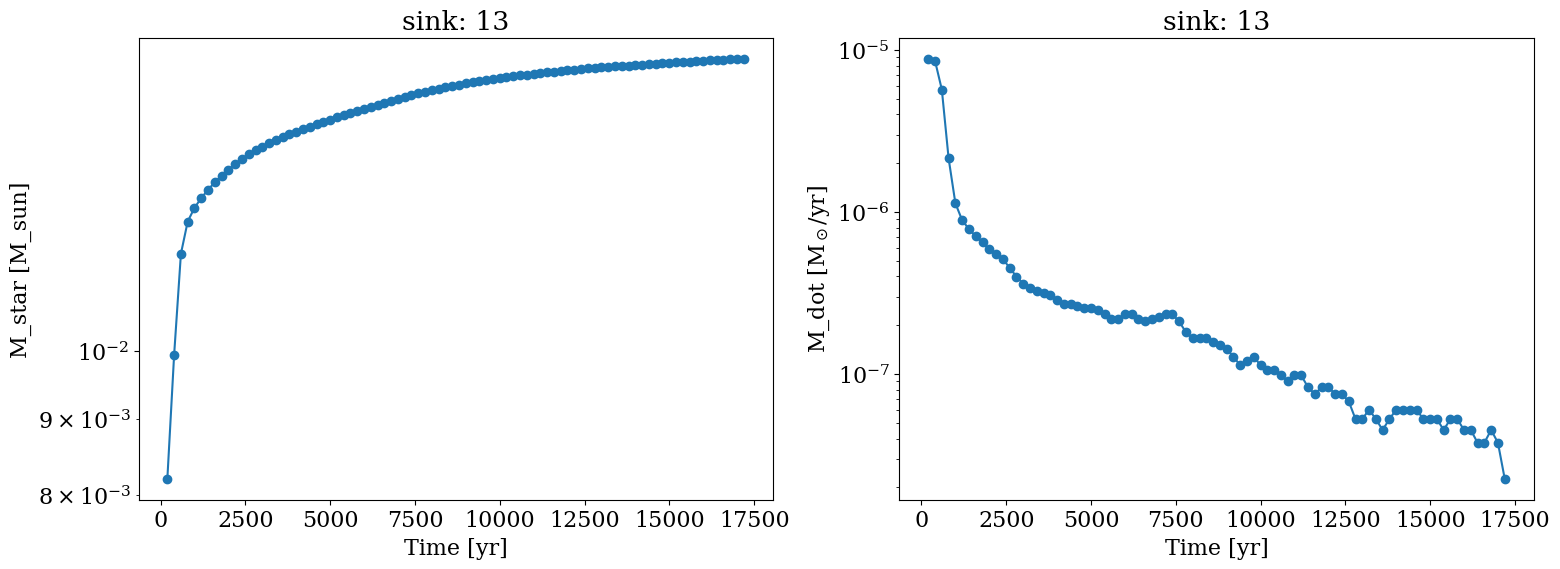

In [20]:
fig, ax = plt.subplots(1,2, figsize = (18, 6))

axs = ax[0]
axs.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [yr]')
axs.semilogy(np.arange(1, len(sink_mass[13]) + 1)  * sn_time, sink_mass[13] * msun_mass, 'o-')
axs.set(title = f'sink: {13}')

axs = ax[1] 
axs.set(ylabel = 'M_dot [M$_\odot$/yr]', xlabel = 'Time [yr]')
axs.semilogy(np.arange(1, len(sink_mass[13]) + 1)  * sn_time, sink_mdot, 'o-')
axs.set(title = f'sink: {sink}')


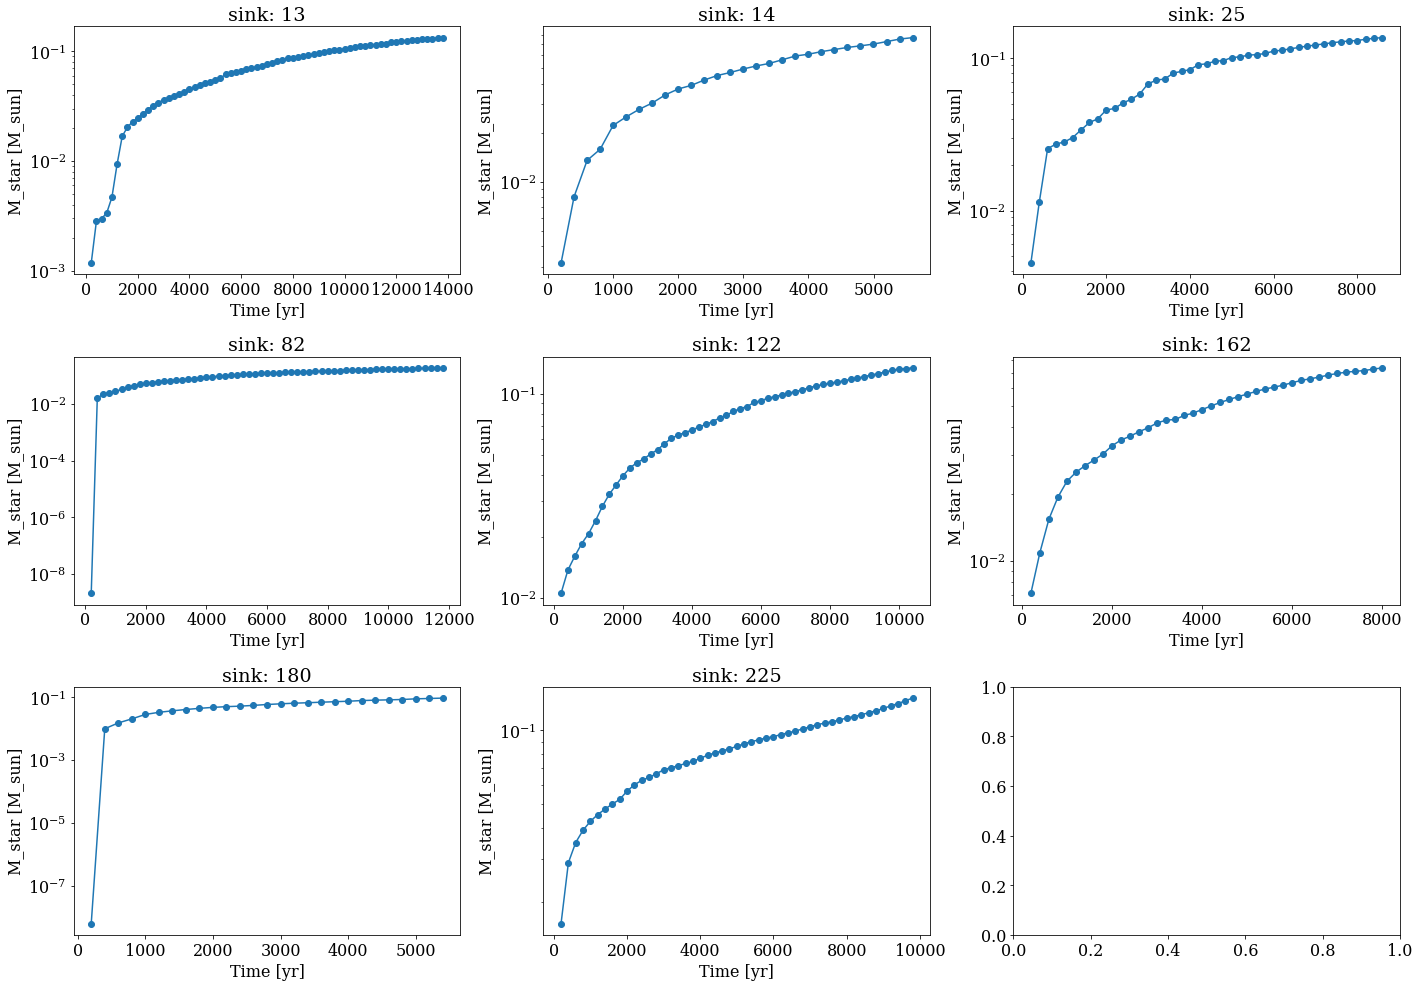

In [12]:
fig, axs = plt.subplots(3,3, figsize = (20, 14))

for ax, sink in zip(axs.flatten(), sinks):

    ax.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [yr]')
    ax.semilogy(np.arange(1, len(sink_mass[sink]) + 1)  * sn_time, sink_mass[sink] * msun_mass, 'o-')
    ax.set(title = f'sink: {sink}')

plt.tight_layout()

In [13]:
sink_mdot = {sink: np.gradient(sink_mass[sink].flatten() * msun_mass, sn_time, edge_order = 2) for sink in sinks}

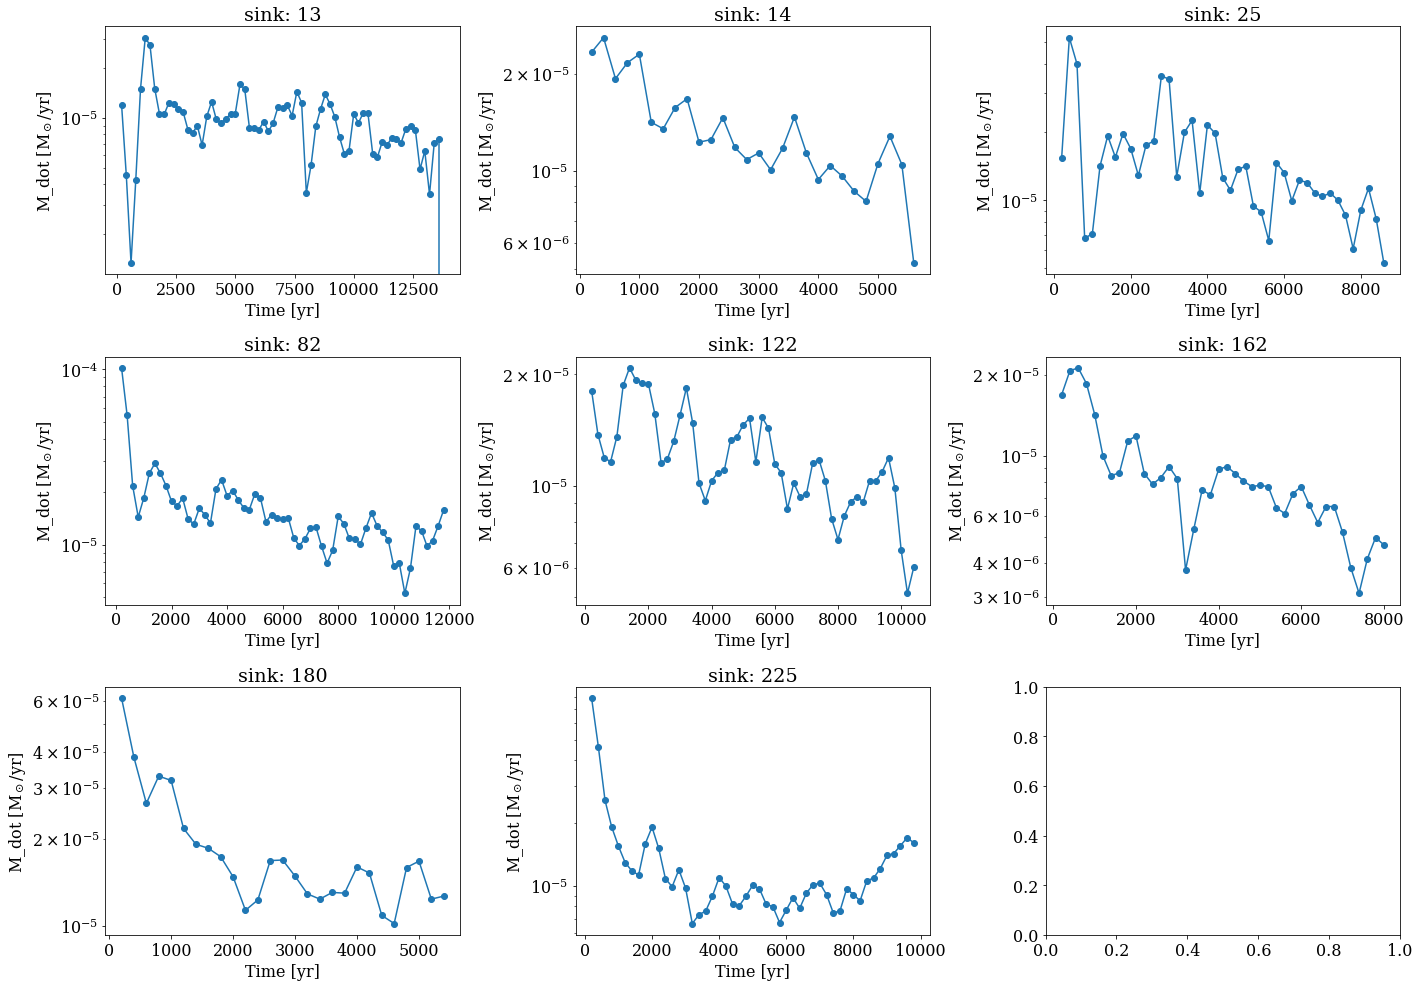

In [14]:
fig, axs = plt.subplots(3,3, figsize = (20, 14))

for ax, sink in zip(axs.flatten(), sinks):

    ax.set(ylabel = 'M_dot [M$_\odot$/yr]', xlabel = 'Time [yr]')
    ax.semilogy(np.arange(1, len(sink_mdot[sink]) + 1)  * sn_time, sink_mdot[sink], 'o-')
    ax.set(title = f'sink: {sink}')

plt.tight_layout()

In [ ]:
T_sink = 6; sink = 6
sink_mass = []
for sn in range(159, 198 + 1):
    df = pd.read_csv(f'data/sink{sink}fmr04/00{sn}/stars.txt', header = 1, delimiter='\s+')
    if np.shape(df)[0] != T_sink + 1: continue
    sink_mass.append(df['m'][T_sink])
sink_mass = np.array(sink_mass)
sink_mdot = np.gradient(sink_mass.flatten() * msun_mass, sn_time, edge_order = 2)

fig, axs = plt.subplots(1,2, figsize = (14, 6))

ax = axs.flatten()[0]
ax.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mass) + 1)  * sn_time, sink_mass * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')


ax = axs.flatten()[1]
ax.set(ylabel = 'Acc. rate [M$_\odot$/yr]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mdot) + 1)  * sn_time, sink_mdot , 'o-')
ax.set(title = f'sink: {sink}')
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'data/sink6fmr04/00170/stars.txt'

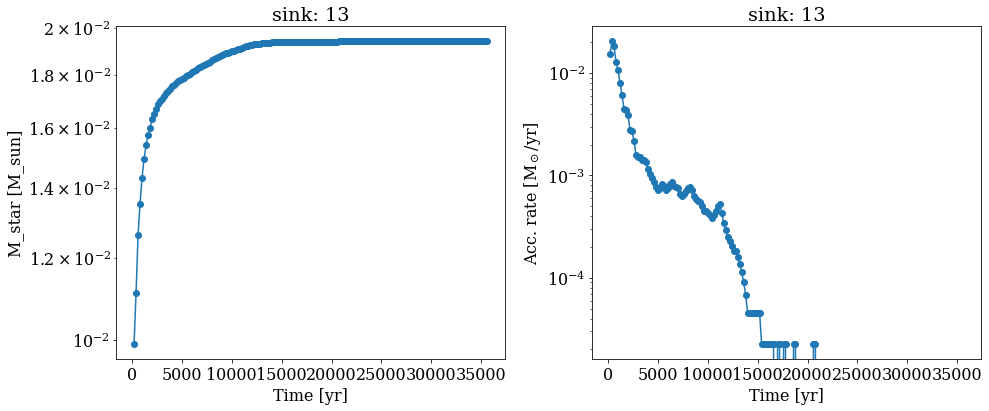

In [ ]:
T_sink = 13; sink = 13
sink_mass = []
for sn in range(223, 401 + 1):
    df = pd.read_csv(f'data/sink{sink}fmr02/00{sn}/stars.txt', header = 1, delimiter='\s+')
    if np.shape(df)[0] != T_sink + 1: continue
    sink_mass.append(df['m'][T_sink])
sink_mass = np.array(sink_mass)
sink_mdot = np.gradient(sink_mass.flatten() * msun_mass, sn_time, edge_order = 2)

fig, axs = plt.subplots(1,2, figsize = (14, 6))

ax = axs.flatten()[0]
ax.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mass) + 1)  * sn_time, sink_mass * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')


ax = axs.flatten()[1]
ax.set(ylabel = 'Acc. rate [M$_\odot$/yr]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mdot) + 1)  * sn_time, sink_mdot * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')
plt.tight_layout()

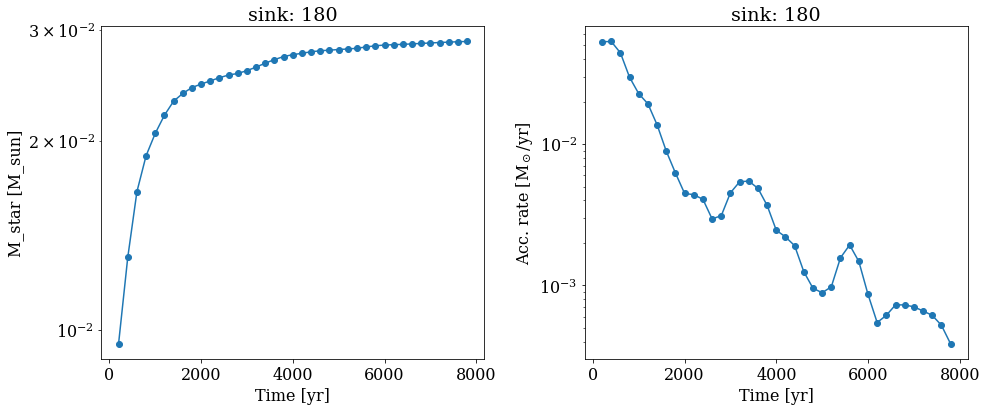

In [ ]:
T_sink = 178; sink = 180
sink_mass = []
for sn in range(404, 442 + 1):
    df = pd.read_csv(f'data/sink{sink}fmr02/00{sn}/stars.txt', header = 1, delimiter='\s+')
    if np.shape(df)[0] != T_sink + 1: continue
    sink_mass.append(df['m'][T_sink])
sink_mass = np.array(sink_mass)
sink_mdot = np.gradient(sink_mass.flatten() * msun_mass, sn_time, edge_order = 2)

fig, axs = plt.subplots(1,2, figsize = (14, 6))

ax = axs.flatten()[0]
ax.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mass) + 1)  * sn_time, sink_mass * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')


ax = axs.flatten()[1]
ax.set(ylabel = 'Acc. rate [M$_\odot$/yr]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mdot) + 1)  * sn_time, sink_mdot * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')
plt.tight_layout()

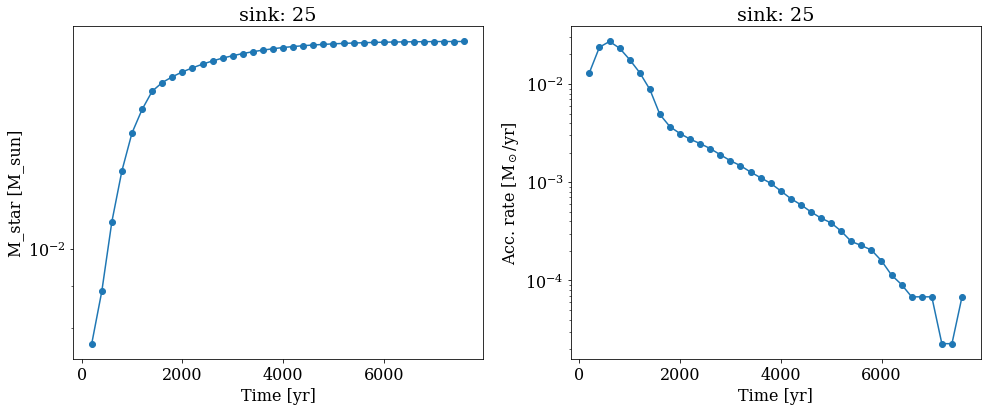

In [ ]:
T_sink = 24; sink = 25
sink_mass = []
for sn in range(213, 250 + 1):
    df = pd.read_csv(f'data/sink{sink}fmr02/00{sn}/stars.txt', header = 1, delimiter='\s+')
    if np.shape(df)[0] != T_sink + 1: continue
    sink_mass.append(df['m'][T_sink])
sink_mass = np.array(sink_mass)
sink_mdot = np.gradient(sink_mass.flatten() * msun_mass, sn_time, edge_order = 2)

fig, axs = plt.subplots(1,2, figsize = (14, 6))

ax = axs.flatten()[0]
ax.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mass) + 1)  * sn_time, sink_mass * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')


ax = axs.flatten()[1]
ax.set(ylabel = 'Acc. rate [M$_\odot$/yr]', xlabel = 'Time [yr]')
ax.semilogy(np.arange(1, len(sink_mdot) + 1)  * sn_time, sink_mdot * msun_mass, 'o-')
ax.set(title = f'sink: {sink}')
plt.tight_layout()